In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
tdoc = pdr.get_data_yahoo('TDOC','2019-05-31')
tdoc.drop('Adj Close', axis=1, inplace=True)
tdoc.drop('High', axis=1, inplace=True)
tdoc.drop('Low', axis=1, inplace=True)

# Get the moving averages
tdoc['3-day'] = tdoc['Close'].rolling(3).mean()
tdoc['9-day'] = tdoc['Close'].rolling(9).mean()
tdoc['21-day'] = tdoc['Close'].rolling(21).mean()
tdoc['Change'] = np.log(tdoc.Close / tdoc.Close.shift())

# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_9v21'] = np.where(tdoc['9-day'] > tdoc['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_9v21'] = np.where(tdoc['9-day'] < tdoc['21-day'],-1,tdoc['position_9v21'])

# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_3v9'] = np.where(tdoc['3-day'] > tdoc['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_3v9'] = np.where(tdoc['3-day'] < tdoc['9-day'],-1,tdoc['position_3v9'])

tdoc['Volatility_21d'] = tdoc.Change.rolling(21).std().shift()
tdoc['Volatility_9d'] = tdoc.Change.rolling(9).std().shift()
tdoc['Volatility_3d'] = tdoc.Change.rolling(3).std().shift()

tdoc.tail()

,Open,Close,Volume,3-day,9-day,21-day,Change,position_9v21,position_3v9,Volatility_21d,Volatility_9d,Volatility_3d
Date,,,,,,,,,,,,
2021-05-27,148.320007,149.000000,3811400,147.260005,142.175557,147.790953,0.004574,-1,1,0.036008,0.022818,0.007314
2021-05-28,150.869995,150.580002,3100800,149.300003,143.644446,146.825239,0.010548,-1,1,0.036135,0.017595,0.010903
2021-06-01,153.869995,152.360001,2722600,150.646667,145.085558,145.873334,0.011752,-1,1,0.031898,0.015136,0.011262
2021-06-02,151.300003,152.740005,1900900,151.893336,146.844447,145.374762,0.002491,1,1,0.031976,0.015060,0.003844
2021-06-03,151.490005,146.589996,2722164,150.563334,147.433336,144.813810,-0.041098,1,1,0.030001,0.011444,0.005035


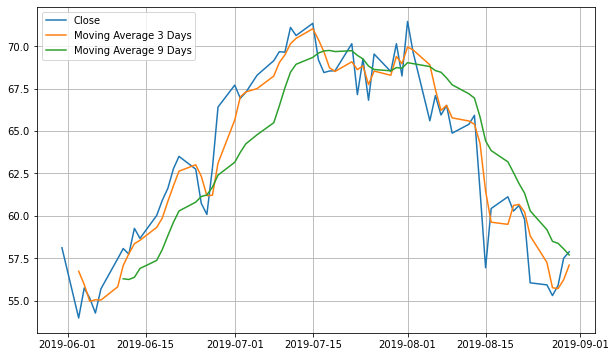

In [37]:
start='20190531'
end= '20190831'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
# plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

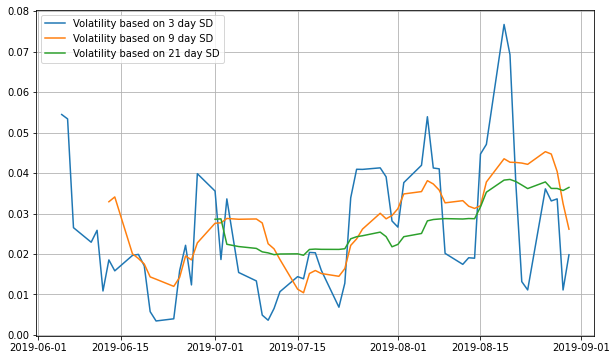

In [3]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Volatility_3d'][start:end],label='Volatility based on 3 day SD')
plt.plot(tdoc['Volatility_9d'][start:end],label='Volatility based on 9 day SD')
plt.plot(tdoc['Volatility_21d'][start:end],label='Volatility based on 21 day SD')
plt.legend(loc=2)

In [38]:
tdoc['Volatility_3d']['2019-07-30']

0.039070808623444225

In [39]:
tdoc['Volatility_3d'].std()

0.023763244742279664

In [40]:
tdoc['Volatility_3d'].mean()

0.032417365314071175

In [41]:
tdoc['Volatility_3d'].describe()

count    504.000000
mean       0.032417
std        0.023763
min        0.000847
25%        0.016169
50%        0.027787
75%        0.041063
max        0.151721
Name: Volatility_3d, dtype: float64

(array([11., 27., 17., 34., 32., 32., 39., 30., 32., 30., 40., 18., 26.,
        22., 16., 20.,  6., 13.,  7.,  8.,  3.,  1.,  6.,  5.,  3.,  4.,
         1.,  2.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  3.,  0.,
         2.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([0.00084738, 0.00386485, 0.00688231, 0.00989978, 0.01291724,
        0.01593471, 0.01895217, 0.02196964, 0.0249871 , 0.02800457,
        0.03102204, 0.0340395 , 0.03705697, 0.04007443, 0.0430919 ,
        0.04610936, 0.04912683, 0.05214429, 0.05516176, 0.05817922,
        0.06119669, 0.06421415, 0.06723162, 0.07024908, 0.07326655,
        0.07628401, 0.07930148, 0.08231894, 0.08533641, 0.08835387,
        0.09137134, 0.0943888 , 0.09740627, 0.10042373, 0.1034412 ,
        0.10645866, 0.10947613, 0.11249359, 0.11551106, 0.11852852,
        0.12154599, 0.12456345, 0.12758092, 0.13059838, 0.13361585,
        0.13663331, 0.13965078, 0.14266824, 0.14568571, 0.14870317,
        0.15172064]),
 <BarContainer

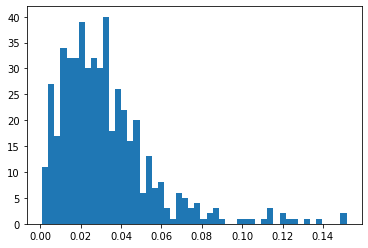

In [47]:
plt.hist(tdoc['Volatility_3d'],bins=50)

In [22]:
tdoc['actual_change'] = tdoc['Close'] - tdoc['Close'].shift()

In [24]:
tdoc['exp_change'] = tdoc['Close'].shift() * tdoc['Volatility_9d']

In [25]:
tdoc_clean = tdoc.iloc[22:].copy()

<AxesSubplot:xlabel='Date'>

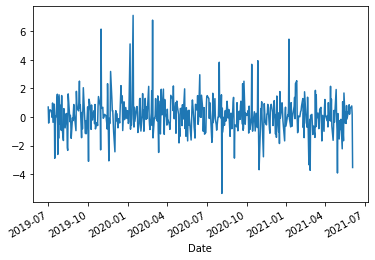

In [26]:
tdoc_clean['Magnitude'] = tdoc_clean['actual_change'] / tdoc_clean['exp_change']
tdoc_clean['Magnitude'].plot()

(array([  1.,   0.,   0.,   1.,   0.,   2.,   0.,   1.,   2.,   2.,   3.,
          7.,   9.,   7.,  11.,  15.,  35.,  76., 103.,  67.,  61.,  19.,
         17.,  16.,   2.,   4.,   4.,   3.,   4.,   1.,   3.,   0.,   1.,
          1.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([-9.62314546, -9.1054566 , -8.58776774, -8.07007887, -7.55239001,
        -7.03470115, -6.51701228, -5.99932342, -5.48163456, -4.96394569,
        -4.44625683, -3.92856797, -3.4108791 , -2.89319024, -2.37550138,
        -1.85781251, -1.34012365, -0.82243478, -0.30474592,  0.21294294,
         0.73063181,  1.24832067,  1.76600953,  2.2836984 ,  2.80138726,
         3.31907612,  3.83676499,  4.35445385,  4.87214271,  5.38983158,
         5.90752044,  6.4252093 ,  6.94289817,  7.46058703,  7.97827589,
         8.49596476,  9.01365362,  9.53134248, 10.04903135, 10.56672021,
        11.08440907, 11.60209794, 12.1197868 , 12.63747567, 13.15516453,
 

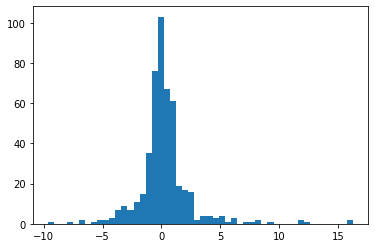

In [18]:
plt.hist(tdoc_clean['Magnitude'], bins=50)

In [19]:
tdoc_clean['abs_magni'] = np.abs(tdoc_clean['Magnitude'])

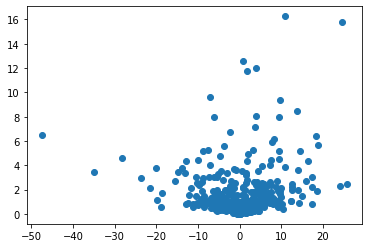

In [20]:
plt.scatter(tdoc_clean['actual_change'], tdoc_clean['abs_magni'])

In [31]:
tdoc_clean['position_3v9'].diff()[start:end][tdoc_clean['position_3v9'].diff() !=0].index.values

array(['2019-07-01T00:00:00.000000000', '2019-07-17T00:00:00.000000000',
       '2019-07-30T00:00:00.000000000', '2019-08-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [36]:
tdoc_clean['position_3v9'].diff()[start:end] #[tdoc_clean['position_3v9'].diff() !=0]

Date
2019-07-01    NaN
2019-07-02    0.0
2019-07-03    0.0
2019-07-05    0.0
2019-07-08    0.0
2019-07-09    0.0
2019-07-10    0.0
2019-07-11    0.0
2019-07-12    0.0
2019-07-15    0.0
2019-07-16    0.0
2019-07-17   -2.0
2019-07-18    0.0
2019-07-19    0.0
2019-07-22    0.0
2019-07-23    0.0
2019-07-24    0.0
2019-07-25    0.0
2019-07-26    0.0
2019-07-29    0.0
2019-07-30    2.0
2019-07-31    0.0
2019-08-01    0.0
2019-08-02    0.0
2019-08-05    0.0
2019-08-06   -2.0
2019-08-07    0.0
2019-08-08    0.0
2019-08-09    0.0
2019-08-12    0.0
2019-08-13    0.0
2019-08-14    0.0
2019-08-15    0.0
2019-08-16    0.0
2019-08-19    0.0
2019-08-20    0.0
2019-08-21    0.0
2019-08-22    0.0
2019-08-23    0.0
2019-08-26    0.0
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
Name: position_3v9, dtype: float64

In [ ]:
tdoc_clean